# Clustering using K-Means and DBSCAN

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [9]:
df = pd.read_csv('segmentation_data.csv')
df.head()

,Age,Income,Recency,TotalAmount
0,68,35340,1,45
1,49,73170,1,726
2,53,65808,1,272
3,38,79529,1,1638
4,50,46374,1,446


## K-Means

K-Means is a popular unsupervised machine learning algorithm used for clustering data. The goal of K-Means is to partition a dataset into K distinct, non-overlapping groups or clusters, where each data point belongs to the cluster with the nearest mean value (centroid). I decided to do a bivariate analysis (for easy visualization) on features 'Age' and 'TotalAmount'.

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['Age', 'TotalAmount']])
df['Age and Total Cluster'] = kmeans.labels_
df.head()

,Age,Income,Recency,TotalAmount,Age and Total Cluster
0,68,35340,1,45,1
1,49,73170,1,726,2
2,53,65808,1,272,1
3,38,79529,1,1638,0
4,50,46374,1,446,1


### Finding the optimal number of clusters with the Elbow Method
The Elbow Method is a technique used to determine the optimal number of clusters (K) in K-Means clustering. It calculate the sum of squared distances (inertia) between each data point and its assigned cluster centroid.

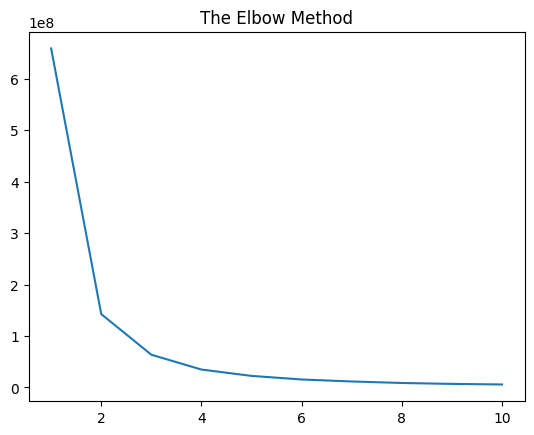

In [11]:
inertia_scores = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(df[['Age', 'TotalAmount']])
    inertia_scores.append(kmean.inertia_)
plt.title('The Elbow Method')
plt.plot(range(1,11),inertia_scores);



Looking at the plot, I chose K = 3 to be the number of clusters

In [12]:
centers = pd.DataFrame(kmeans.cluster_centers_)
centers.columns = ['x', 'y']

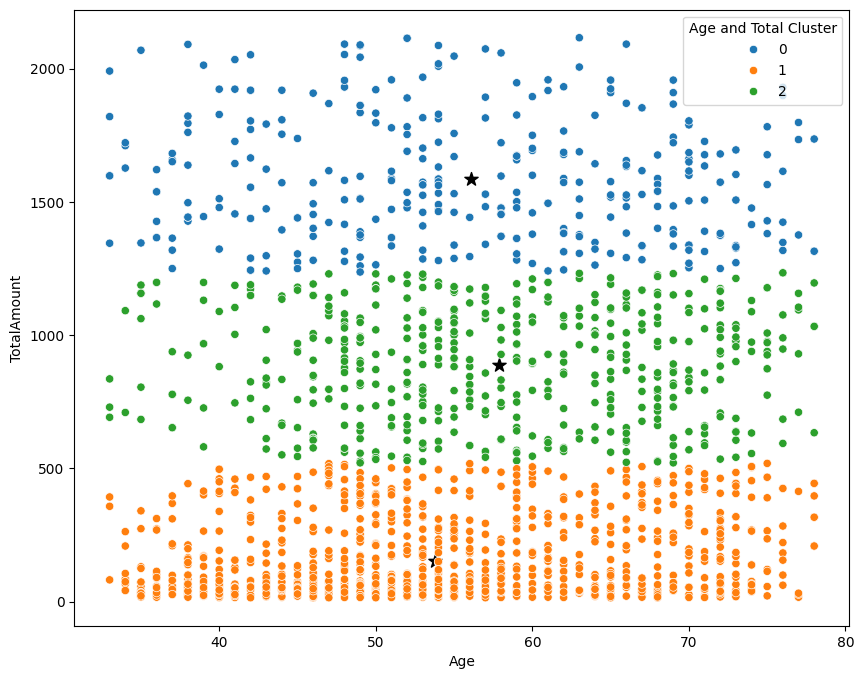

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Age', y='TotalAmount', hue='Age and Total Cluster', palette='tab10');

### K-Means Cluster Analysis
The K-Means algorithm partitioned the data into 3 clusters, with the stars representing the centroids.
- Cluster 0 would be the ideal target group for a new membership, since they have the highest total amount spent.
- Cluster 1 could be targeted as well for the new membership. Another idea for the store is to offer these customers more deals to encourage them to buy more.
- Cluster 2 would not be idea for the new membership, as they don't spend much at this store.

## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that groups together points that are closely packed together, while marking points that lie alone in low-density regions as outliers.

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import RobustScaler

# Scale the data
x = df[['Age', 'Income']]
scr = RobustScaler()
scr.fit(x)
x = pd.DataFrame(scr.transform(x),columns=x.columns)



clustering = DBSCAN(eps=0.09,min_samples=10)
clustering.fit(x)
x['Age and Income Cluster'] = clustering.labels_
x.head(10)


,Age,Income,Age and Income Cluster
0,0.777778,-0.497920,1
1,-0.277778,0.694553,0
2,-0.055556,0.462489,0
3,-0.888889,0.895001,-1
4,-0.222222,-0.150107,0
5,-1.111111,-1.033445,7
6,-0.777778,0.448682,-1
7,0.555556,-0.375363,-1
8,0.500000,1.063201,0
9,0.111111,0.320830,0


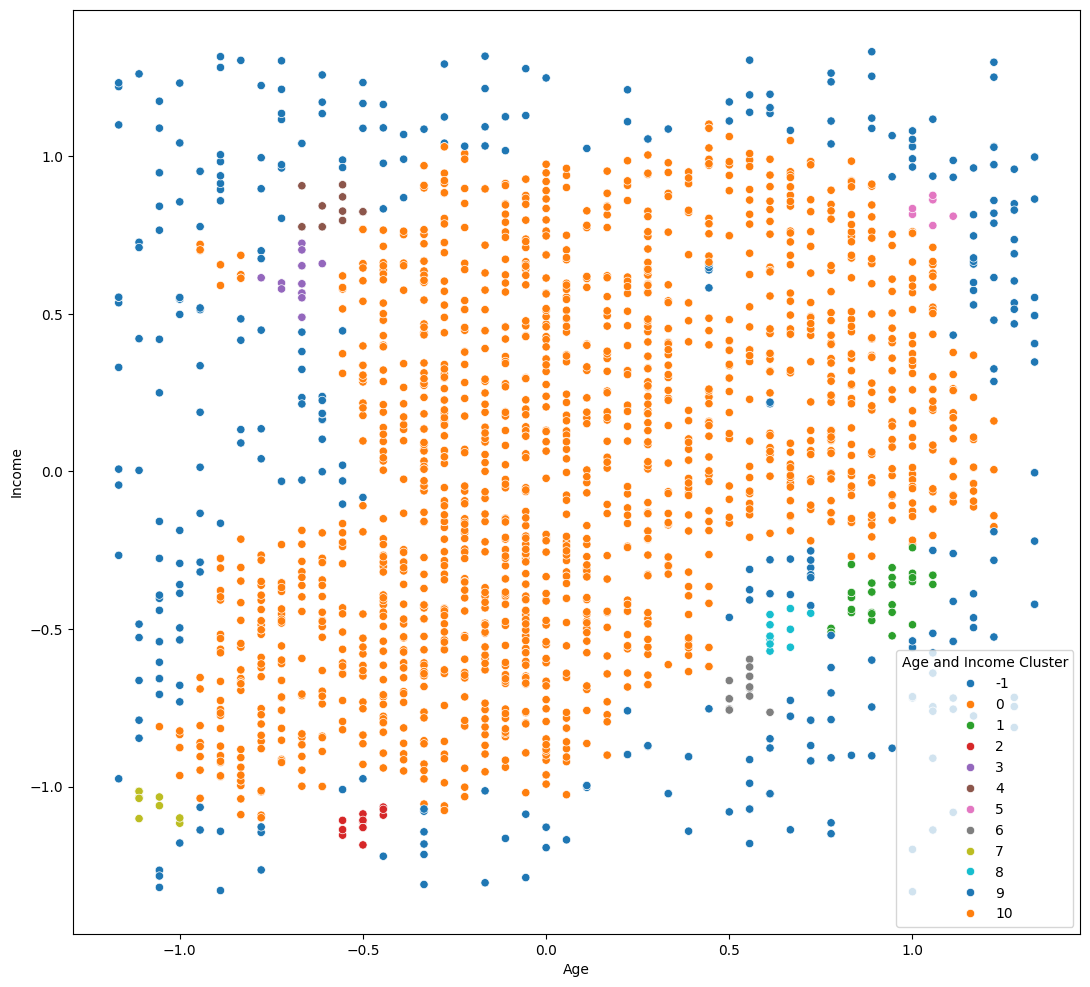

In [15]:
plt.figure(figsize=(13,12))
sns.scatterplot(data=x, x='Age', y='Income', hue='Age and Income Cluster', palette='tab10');